In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Zomato_Data_Analysis/food.csv'  # Replace with your file path
df_food = pd.read_csv(file_path)
df_food.head()


Mounted at /content/drive


,Unnamed: 0,f_id,item,veg_or_non_veg
0,0,fd0,Aloo Tikki Burger,Veg
1,1,fd1,Veg Creamy Burger,Veg
2,2,fd2,Cheese Burst Burger,Veg
3,3,fd3,Paneer Creamy Burger,Veg
4,4,fd4,Maxican Burger,Veg


In [2]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371561 entries, 0 to 371560
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      371561 non-null  int64 
 1   f_id            371561 non-null  object
 2   item            371560 non-null  object
 3   veg_or_non_veg  371560 non-null  object
dtypes: int64(1), object(3)
memory usage: 11.3+ MB


In [3]:
df_food.columns

Index(['Unnamed: 0', 'f_id', 'item', 'veg_or_non_veg'], dtype='object')

In [4]:
df_food[df_food.isnull().any(axis=1)]

,Unnamed: 0,f_id,item,veg_or_non_veg
166711,166711,fd413746,NaN,NaN


In [5]:
df_food.isnull().sum()

,0
Unnamed: 0,0
f_id,0
item,1
veg_or_non_veg,1


In [6]:
df_food['veg_or_non_veg'].unique()

array(['Veg', 'Non-veg', nan], dtype=object)

In [7]:
df_food['veg_or_non_veg'].value_counts()

,count
veg_or_non_veg,
Veg,270776
Non-veg,100784


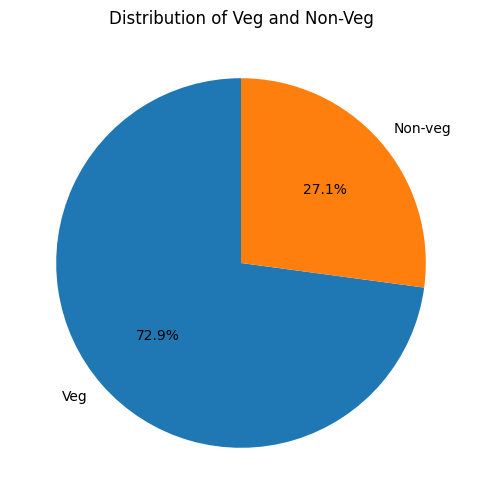

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

veg_counts = df_food['veg_or_non_veg'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size if needed
plt.pie(veg_counts, labels=veg_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Veg and Non-Veg')
plt.show()

In [9]:
df_menu = pd.read_csv('/content/drive/My Drive/Zomato_Data_Analysis/menu.csv')
df_menu.head()

<ipython-input-9-4b1480463f7d>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_menu = pd.read_csv('/content/drive/My Drive/Zomato_Data_Analysis/menu.csv')


,Unnamed: 0,menu_id,r_id,f_id,cuisine,price
0,0,mn0,567335,fd0,"Beverages,Pizzas",40.0
1,1,mn0,567335,fd669322,"Beverages,Pizzas",40.0
2,2,mn328,158203,fd0,Beverages,65.0
3,3,mn328,158203,fd669322,Beverages,65.0
4,4,mn449,158203,fd0,Beverages,65.0


In [10]:
df_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179936 entries, 0 to 1179935
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1179936 non-null  int64 
 1   menu_id     1179936 non-null  object
 2   r_id        1179936 non-null  int64 
 3   f_id        1179936 non-null  object
 4   cuisine     1179936 non-null  object
 5   price       1179936 non-null  object
dtypes: int64(2), object(4)
memory usage: 54.0+ MB


In [11]:
df_menu.columns

Index(['Unnamed: 0', 'menu_id', 'r_id', 'f_id', 'cuisine', 'price'], dtype='object')

In [13]:
df_menu.isnull().sum()

,0
Unnamed: 0,0
menu_id,0
r_id,0
f_id,0
cuisine,0
price,0


In [14]:
df_menu['cuisine'].unique()

array(['Beverages,Pizzas', 'Beverages', 'Continental', ..., 'Hyderabadi',
       'Healthy Food,Indian', 'Continental,Pan-Asian'], dtype=object)

In [15]:
df_menu['cuisine'].value_counts()

,count
cuisine,
"North Indian,Chinese",82883
"Indian,Chinese",61419
North Indian,45504
Indian,43396
"Chinese,North Indian",26188
...,...
"South Indian, Snacks, Fast Food",1
"South Indian, Desserts",1
"Street Food, Indian, Chaat",1


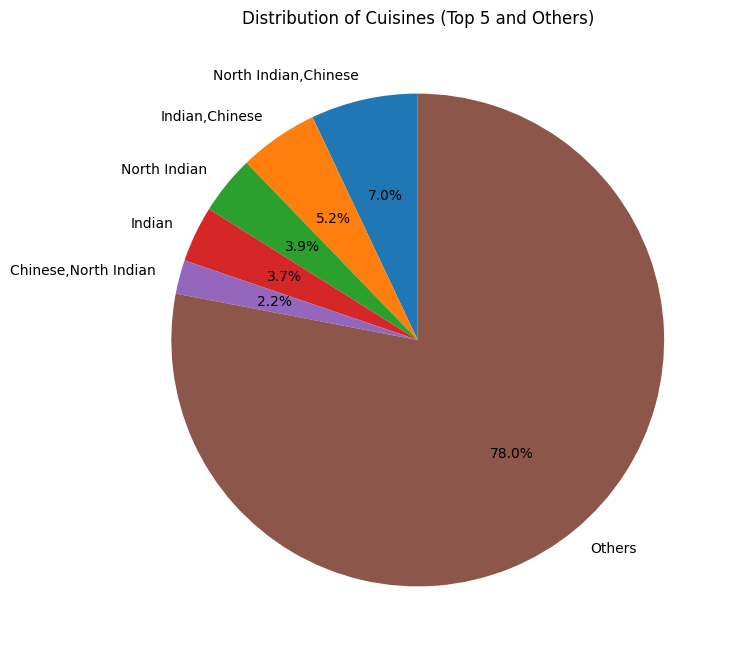

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Get value counts for 'cuisine'
cuisine_counts = df_menu['cuisine'].value_counts()

# Select top 5 cuisines and group the rest as "Others"
top_5_cuisines = cuisine_counts[:5]
other_cuisines_count = cuisine_counts[5:].sum()

# Combine top 5 and "Others" for the pie chart
# Use pd.concat instead of append
pie_chart_data = pd.concat([top_5_cuisines, pd.Series([other_cuisines_count], index=['Others'])])

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(pie_chart_data, labels=pie_chart_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cuisines (Top 5 and Others)')
plt.show()

In [17]:
df_menu['price'].value_counts()

,count
price,
120.0,28052
150.0,26758
100.0,23982
180.0,23222
140.0,22134
...,...
548.57,1
1085.71,1
999.99,1


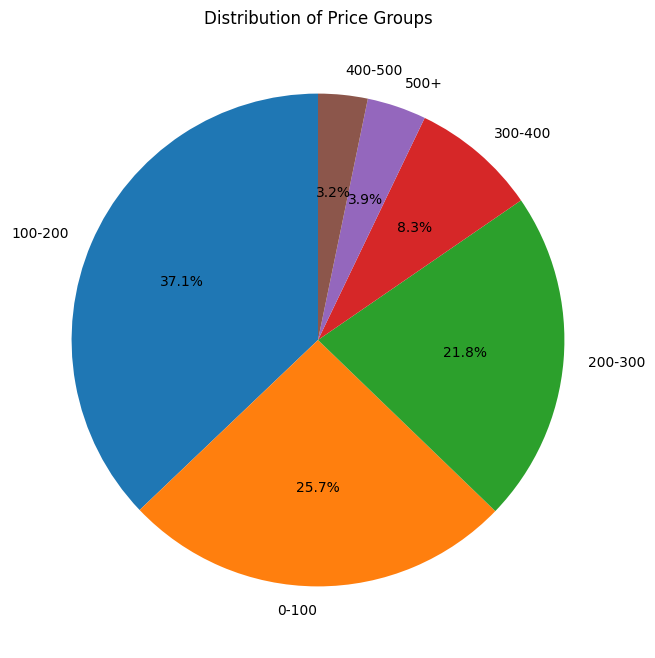

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Create bins for the price ranges
bins = [0, 100, 200, 300, 400, 500, float('inf')]  # Last bin for values above 50
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500+']

# Convert 'price' column to numeric, handling errors
df_menu['price'] = pd.to_numeric(df_menu['price'], errors='coerce')

# Cut the price column into groups and assign labels
df_menu['price_group'] = pd.cut(df_menu['price'], bins=bins, labels=labels)

# Get value counts for each group
price_group_counts = df_menu['price_group'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(price_group_counts, labels=price_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Price Groups')
plt.show()

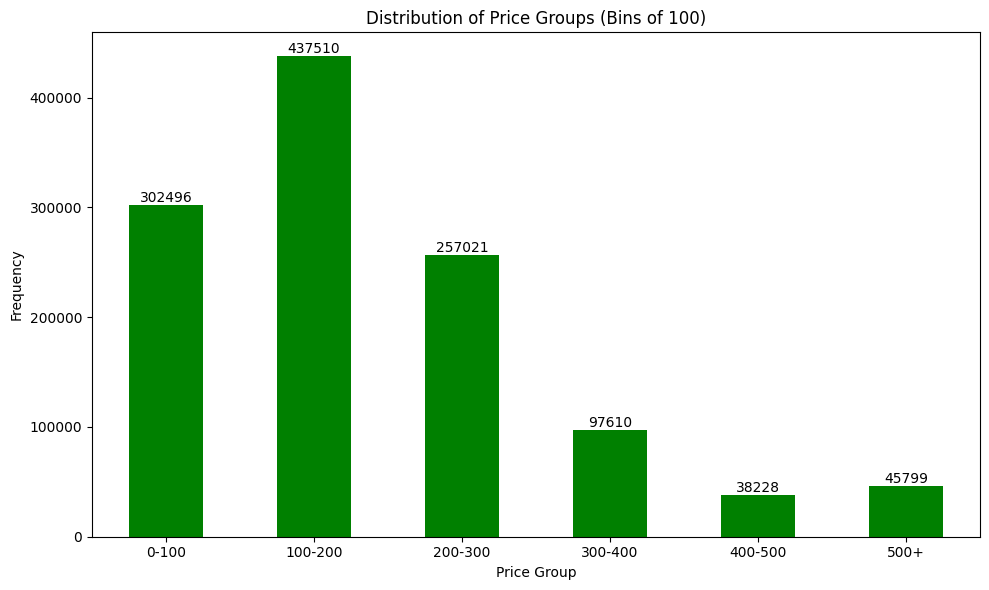

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Create bins for the price ranges with increments of 100
bins = [0, 100, 200, 300, 400, 500, float('inf')]  # Last bin for values above 500
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500+']

# Convert 'price' column to numeric, handling errors
df_menu['price'] = pd.to_numeric(df_menu['price'], errors='coerce')

# Cut the price column into groups and assign labels
df_menu['price_group'] = pd.cut(df_menu['price'], bins=bins, labels=labels)

# Get value counts for each group
price_group_counts = df_menu['price_group'].value_counts()

# Reindex the price_group_counts Series to match the order of labels
price_group_counts = price_group_counts.reindex(labels)

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
ax = price_group_counts.plot(kind='bar', color='green')  # Store the Axes object

# Add value counts on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.title('Distribution of Price Groups (Bins of 100)')
plt.xlabel('Price Group')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [20]:
df_menu['f_id'].value_counts()

,count
f_id,
fd47270,3019
fd1211,3019
fd28,2888
fd47161,2888
fd47222,2884
...,...
fd366522,1
fd366517,1
fd366504,1


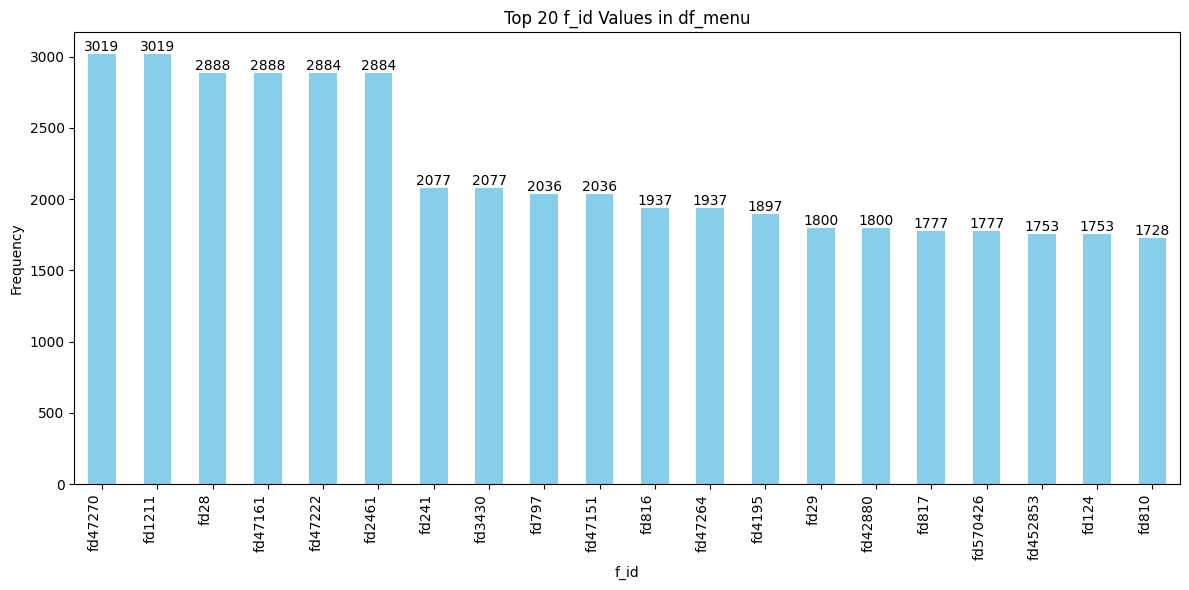

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the top 20 f_id values and their counts
top_20_f_id = df_menu['f_id'].value_counts().head(20)

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
ax = top_20_f_id.plot(kind='bar', color='skyblue')

# Add value counts on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.title('Top 20 f_id Values in df_menu')
plt.xlabel('f_id')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

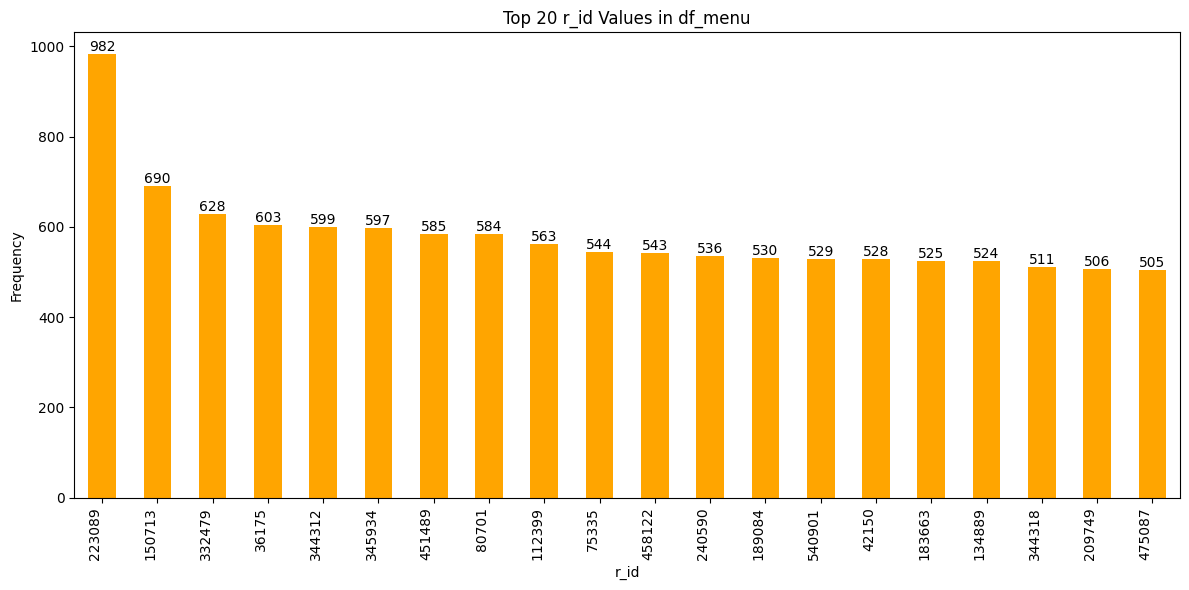

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the top 20 r_id values and their counts
top_20_r_id = df_menu['r_id'].value_counts().head(20)

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
ax = top_20_r_id.plot(kind='bar', color='orange')

# Add value counts on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.title('Top 20 r_id Values in df_menu')
plt.xlabel('r_id')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [23]:
df_orders = pd.read_csv('/content/drive/My Drive/Zomato_Data_Analysis/orders.csv')
df_orders.head()

,Unnamed: 0,order_date,sales_qty,sales_amount,currency,user_id,r_id
0,0,2017-10-10,100,41241,INR,49226,567335.0
1,1,2018-05-08,3,-1,INR,77359,531342.0
2,2,2018-04-06,1,875,INR,5321,158203.0
3,3,2018-04-11,1,583,INR,21343,187912.0
4,4,2018-06-18,6,7176,INR,75378,543530.0


In [25]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150281 entries, 0 to 150280
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    150281 non-null  int64  
 1   order_date    150281 non-null  object 
 2   sales_qty     150281 non-null  int64  
 3   sales_amount  150281 non-null  int64  
 4   currency      150281 non-null  object 
 5   user_id       150281 non-null  int64  
 6   r_id          148664 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 8.0+ MB


In [26]:
df_orders.isnull().sum()

,0
Unnamed: 0,0
order_date,0
sales_qty,0
sales_amount,0
currency,0
user_id,0
r_id,1617


In [27]:
df_orders['currency'].value_counts()

,count
currency,
INR\r,150000
INR,279
USD,2


In [28]:
df_orders[df_orders['currency'] == 'USD']

,Unnamed: 0,order_date,sales_qty,sales_amount,currency,user_id,r_id
5,5,2017-11-20,59,500,USD,34323,158204.0
6,6,2017-11-22,36,250,USD,33246,156588.0


1 usd = 82.5 inr (in 2023)

In [29]:
df_orders['order_date'].nunique()

806

In [30]:
df_orders['order_date'].value_counts()

,count
order_date,
2018-06-22,378
2018-07-20,344
2018-12-21,343
2018-06-11,335
2017-11-03,331
...,...
2019-09-21,1
2018-05-27,1
2018-11-17,1


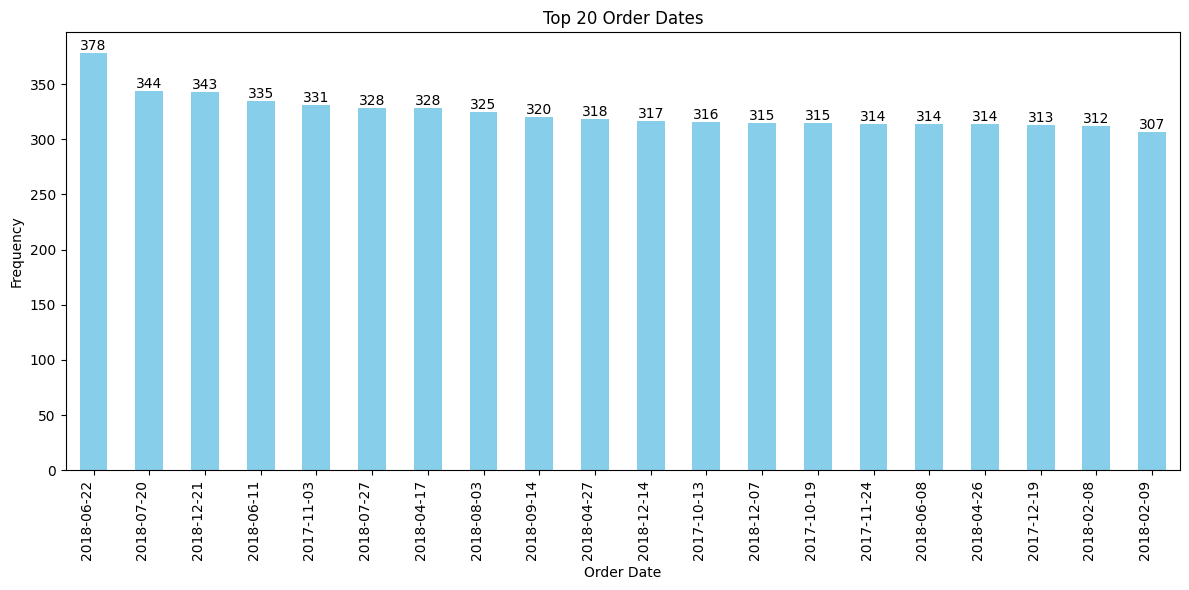

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the top 20 order dates and their counts
top_20_order_dates = df_orders['order_date'].value_counts().head(20)

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
ax = top_20_order_dates.plot(kind='bar', color='skyblue')

# Add value counts on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.title('Top 20 Order Dates')
plt.xlabel('Order Date')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

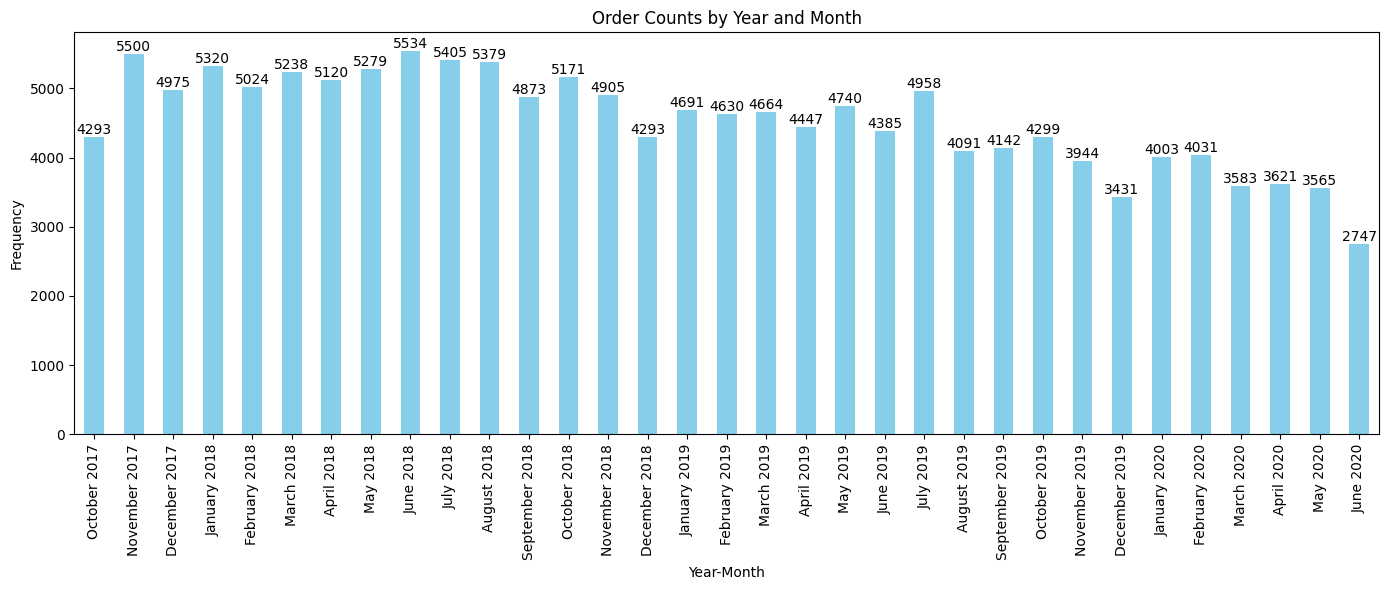

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'order_date' to datetime objects
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])

# Extract year and month and create a new column 'year_month'
df_orders['year_month'] = df_orders['order_date'].dt.strftime('%Y-%m')

# Get the order counts for each year-month
order_counts_by_month = df_orders['year_month'].value_counts().sort_index()

# Create a list of month names for the x-axis labels
month_names = order_counts_by_month.index.map(lambda x: pd.to_datetime(x).strftime('%B %Y'))

# Create the bar chart
plt.figure(figsize=(14, 6))  # Adjust figure size if needed
ax = order_counts_by_month.plot(kind='bar', color='skyblue')

# Add value counts on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.title('Order Counts by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.xticks(range(len(month_names)), month_names, rotation=90, ha='center') # Set x-axis labels to month names
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

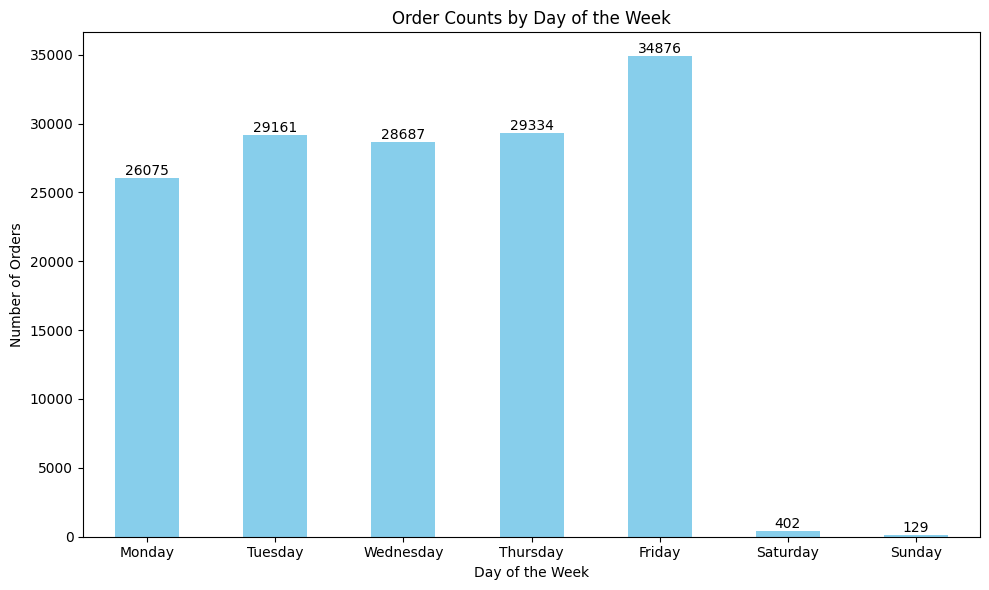

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_orders is your DataFrame
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])
df_orders['day_of_week'] = df_orders['order_date'].dt.day_name()
daily_order_counts = df_orders.groupby('day_of_week')['r_id'].count()

# Order the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_order_counts = daily_order_counts.reindex(day_order)

plt.figure(figsize=(10, 6))
ax = daily_order_counts.plot(kind='bar', color='skyblue')  # Store the Axes object

# Add value counts on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.title('Order Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

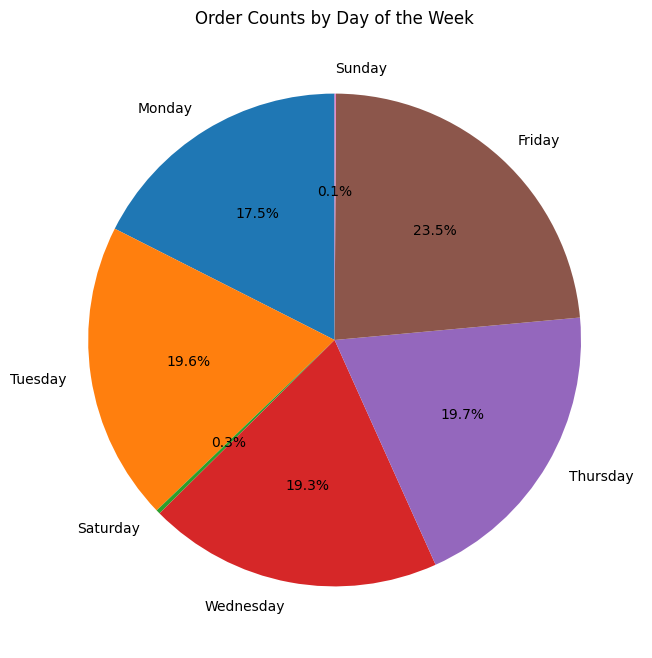

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_orders is your DataFrame
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])
df_orders['day_of_week'] = df_orders['order_date'].dt.day_name()
daily_order_counts = df_orders.groupby('day_of_week')['r_id'].count()

# Order the days of the week
day_order = ['Monday', 'Tuesday','Saturday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']
daily_order_counts = daily_order_counts.reindex(day_order)

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(daily_order_counts, labels=daily_order_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Order Counts by Day of the Week')
plt.show()

In [35]:
df_restaurant = pd.read_csv('/content/drive/My Drive/Zomato_Data_Analysis/restaurant.csv')
df_restaurant.head()

,Unnamed: 0,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [36]:
df_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    148541 non-null  int64 
 1   id            148541 non-null  int64 
 2   name          148455 non-null  object
 3   city          148541 non-null  object
 4   rating        148455 non-null  object
 5   rating_count  148455 non-null  object
 6   cost          148410 non-null  object
 7   cuisine       148442 non-null  object
 8   lic_no        148312 non-null  object
 9   link          148541 non-null  object
 10  address       148455 non-null  object
 11  menu          148541 non-null  object
dtypes: int64(2), object(10)
memory usage: 13.6+ MB


In [37]:
df_restaurant.isnull().sum()

,0
Unnamed: 0,0
id,0
name,86
city,0
rating,86
rating_count,86
cost,131
cuisine,99
lic_no,229
link,0


In [43]:
df_restaurant[df_restaurant.isnull().any(axis=1)]

,Unnamed: 0,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
795,795,301904,SHAKE IT BABY,Agra,--,Too Few Ratings,₹ 200,"Italian,Beverages",NaN,https://www.swiggy.com/restaurants/shake-it-ba...,"SHAKE IT BABY, M/S SHAKE IT BABY SHOP NO-6 SUR...",Menu/301904.json
1299,1299,358634,Meal Factory - By The Healthy Stove,"Vastrapur,Ahmedabad",--,Too Few Ratings,₹ 300,Indian,NaN,https://www.swiggy.com/restaurants/meal-factor...,"Meal Factory - By The Healthy Stove, 'The Heal...",Menu/358634.json
1303,1303,77532,Shiv Shakti Kathiyawadi,"Vastrapur,Ahmedabad",4.1,100+ ratings,₹ 300,Indian,NaN,https://www.swiggy.com/restaurants/shiv-shakti...,"Shiv Shakti Kathiyawadi, 23-24, Ground Floor, ...",Menu/77532.json
4242,4242,93703,Tomato'S,"Chandkheda,Ahmedabad",4.3,100+ ratings,₹ 800,"Mexican,North Indian",NaN,https://www.swiggy.com/restaurants/tomatos-mot...,"Tomato'S, Ground Floor, Shop No. 1, Dwarkesh B...",Menu/93703.json
4966,4966,132295,Chinese Hut,Akola,3.7,50+ ratings,NaN,Chinese,21518145000592,https://www.swiggy.com/restaurants/chinese-hut...,"Chinese Hut, Sindhi Colony, Akola, Maharashtra...",Menu/132295.json
...,...,...,...,...,...,...,...,...,...,...,...,...
147127,147127,246351,WRAP IT - Eat Yummmm!,"Gajuwaka,Vizag",4.1,500+ ratings,₹ 190,"Mexican,Fast Food",NaN,https://www.swiggy.com/restaurants/wrap-it-eat...,"WRAP IT - Eat Yummmm!, Door 16-246, Kitchen 1,...",Menu/246351.json
147169,147169,66873,Friends Tandoori Point,"Gajuwaka,Vizag",--,Too Few Ratings,₹ 200,"Indian,Tandoor",NaN,https://www.swiggy.com/restaurants/friends-tan...,"Friends Tandoori Point, Chaitanya Nagar, Gajuw...",Menu/66873.json
147872,147872,425369,THE KURTOS,"Dwarka Nagar,Vizag",2.9,20+ ratings,₹ 250,NaN,10121028000339,https://www.swiggy.com/restaurants/the-kurtos-...,"THE KURTOS, 10-50-24, SIRIPURAM CIR, OPP. HSBC...",Menu/425369.json
147930,147930,425304,The Fritter Fries,"Dwarka Nagar,Vizag",3.7,20+ ratings,₹ 250,NaN,10121028000339,https://www.swiggy.com/restaurants/the-fritter...,"The Fritter Fries, 10-50-24, Siripuram Cir, op...",Menu/425304.json


In [48]:
df_restaurant[(df_restaurant['name'].isnull()) | (df_restaurant['address'].isnull())]

,Unnamed: 0,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
31044,31044,397961,NaN,"Greater Mohali,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/5-tara-grea...,NaN,Menu/397961.json
32912,32912,308071,NaN,"West Chd,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/food-under-...,NaN,Menu/308071.json
33046,33046,308662,NaN,"West Chd,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/franks-frie...,NaN,Menu/308662.json
33488,33488,170889,NaN,"South Chd,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/dhaba-7-pre...,NaN,Menu/170889.json
36492,36492,390394,NaN,"George Town,Chennai",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/frozen-cafe...,NaN,Menu/390394.json
...,...,...,...,...,...,...,...,...,...,...,...,...
137122,137122,256827,NaN,Satara,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/rajdhani-pa...,NaN,Menu/256827.json
137546,137546,567595,NaN,Shillong,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/the-blue-ri...,NaN,Menu/567595.json
137614,137614,116615,NaN,Shivamogga,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/bakers-bowl...,NaN,Menu/116615.json
138380,138380,401760,NaN,Sirsa,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/murga-dlf-p...,NaN,Menu/401760.json


In [49]:
df_restaurant[(df_restaurant['name'].isnull()) |
              (df_restaurant['address'].isnull()) |
              (df_restaurant['rating'].isnull()) |
              (df_restaurant['rating_count'].isnull())]

,Unnamed: 0,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
31044,31044,397961,NaN,"Greater Mohali,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/5-tara-grea...,NaN,Menu/397961.json
32912,32912,308071,NaN,"West Chd,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/food-under-...,NaN,Menu/308071.json
33046,33046,308662,NaN,"West Chd,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/franks-frie...,NaN,Menu/308662.json
33488,33488,170889,NaN,"South Chd,Chandigarh",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/dhaba-7-pre...,NaN,Menu/170889.json
36492,36492,390394,NaN,"George Town,Chennai",NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/frozen-cafe...,NaN,Menu/390394.json
...,...,...,...,...,...,...,...,...,...,...,...,...
137122,137122,256827,NaN,Satara,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/rajdhani-pa...,NaN,Menu/256827.json
137546,137546,567595,NaN,Shillong,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/the-blue-ri...,NaN,Menu/567595.json
137614,137614,116615,NaN,Shivamogga,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/bakers-bowl...,NaN,Menu/116615.json
138380,138380,401760,NaN,Sirsa,NaN,NaN,NaN,NaN,NaN,https://www.swiggy.com/restaurants/murga-dlf-p...,NaN,Menu/401760.json


In [50]:
import pandas as pd

def extract_name_from_link(link):
    if pd.isnull(link):  # Handle NaN or empty links
        return None
    parts = link.split('/')
    if 'restaurants' in parts:
        restaurant_index = parts.index('restaurants') + 1
        if restaurant_index < len(parts):
            name_parts = parts[restaurant_index].split('-')[:4]  # Extract first 4 words
            return ' '.join(name_parts).title()  # Join and title case
    return None

df_restaurant.loc[df_restaurant['name'].isnull(), 'name'] = df_restaurant.loc[df_restaurant['name'].isnull(), 'link'].apply(extract_name_from_link)

print(df_restaurant['name'].isnull().sum())

0


In [ ]:
df_users = pd.read_csv('/content/drive/My Drive/Zomato_Data_Analysis/users.csv')
df_users.head()

,Unnamed: 0,user_id,name,email,password,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size
0,0,1,Claire Ferguson,fordanthony@example.net,NKz0fWDh!5,20,Female,Single,Student,No Income,Post Graduate,4
1,1,2,Jennifer Young,ann96@example.com,+i5Q91jt!s,24,Female,Single,Student,Below Rs.10000,Graduate,3
2,2,3,Jermaine Roberson,uwalker@example.org,eO4GqGusF(,22,Male,Single,Student,Below Rs.10000,Post Graduate,3
3,3,4,Rachel Carpenter,kimberlypatterson@example.net,d^c7O6odaS,22,Female,Single,Student,No Income,Graduate,6
4,4,5,Shawn Parker,daniellebennett@example.com,8J#E5RMl1o,22,Male,Single,Student,Below Rs.10000,Post Graduate,4


In [52]:
df_restaurant['cost']

,cost
0,₹ 200
1,₹ 200
2,₹ 100
3,₹ 250
4,₹ 250
...,...
148536,₹ 200
148537,₹ 300
148538,₹ 300
148539,₹ 250


In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Unnamed: 0                  100000 non-null  int64 
 1   user_id                     100000 non-null  int64 
 2   name                        100000 non-null  object
 3   email                       100000 non-null  object
 4   password                    100000 non-null  object
 5   Age                         100000 non-null  int64 
 6   Gender                      100000 non-null  object
 7   Marital Status              100000 non-null  object
 8   Occupation                  100000 non-null  object
 9   Monthly Income              100000 non-null  object
 10  Educational Qualifications  100000 non-null  object
 11  Family size                 100000 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 9.2+ MB


In [ ]:
df_users.isnull().sum()

,0
Unnamed: 0,0
user_id,0
name,0
email,0
password,0
Age,0
Gender,0
Marital Status,0
Occupation,0
Monthly Income,0
